In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import warnings
warnings.simplefilter(action="ignore")
import datetime as dt
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
data = pd.read_excel("Ireland.xlsx")

In [3]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Day of Week,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,489520,35751C,PURPLE CURRENT CANDLE RING,12,2009-12-01 11:41:00,0.75000,14911,EIRE,9.00000,Tuesday,NaN,NaN,NaN
1,489520,72739B,WHITE CHOCOLATE SCENT CANDLE,12,2009-12-01 11:41:00,1.25000,14911,EIRE,15.00000,Tuesday,NaN,NaN,NaN
2,489520,22114,HOT WATER BOTTLE TEA AND SYMPATHY,8,2009-12-01 11:41:00,3.95000,14911,EIRE,31.60000,Tuesday,NaN,NaN,11905.00000
3,489520,22212,FOUR HOOK WHITE LOVEBIRDS,6,2009-12-01 11:41:00,2.10000,14911,EIRE,12.60000,Tuesday,NaN,NaN,NaN
4,489520,21523,FANCY FONT HOME SWEET HOME DOORMAT,2,2009-12-01 11:41:00,6.75000,14911,EIRE,13.50000,Tuesday,NaN,NaN,NaN


In [5]:
data.shape

(11905, 13)

In [6]:
data.groupby("Invoice").agg({"Description" : "count"}).sort_values("Description", ascending=False).head()

,Description
Invoice,
532993,167
562560,130
507210,119
536975,110
544074,106


In [7]:
data.groupby("Invoice").agg({"Description" : "count"}).describe().T

,count,mean,std,min,25%,50%,75%,max
Description,484.00000,24.59711,20.77228,1.00000,10.00000,20.00000,35.25000,167.00000


array([[<AxesSubplot:title={'center':'Description'}>]], dtype=object)

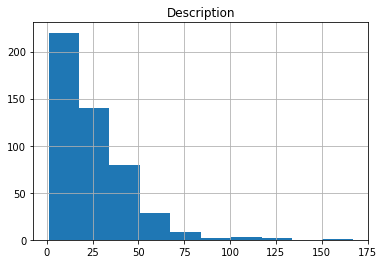

In [8]:
data.groupby("Invoice").agg({"Description" : "count"}).hist()

In [9]:
products = {}
for i in data["Invoice"]:
    products[i] = list(data[data["Invoice"] == i ]["Description"])

In [10]:
normal_baskets = {}
large_baskets = {}
for i,j in products.items():
    if len(j) < 70:
        normal_baskets[i] = j
    else:
        large_baskets[i] = j

In [11]:
max_len = 0 
for i in normal_baskets.values():
    if len(i) > max_len:
        max_len = len(i)

In [12]:
max_len 

68

In [13]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
oht_ary = te.fit(normal_baskets.values()).transform(normal_baskets.values(), sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df.head()

4 PURPLE FLOCK DINNER CANDLES   CHERRY BLOSSOM  DECORATIVE FLASK  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

    DOLLY GIRL BEAKER   HOME SWEET HOME  BLACKBOARD  \
0                   0                             0   
1                   0                             0   
2                   0                             0   
3                   0                             0   
4                   0                             0   

    IVORY PAPER CUP CAKE CASES    PAINT YOUR OWN CANVAS SET  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             0                           0   

    RED/WHITE DOT MINI CASES   TRELLIS COAT RACK   WHITE CHERRY LIGHTS  \
0                          0                   0                     0   
1                          0                   0                     0   
2                          0                   0                     0   
3                          0                   0                     0   
4                          0                   0                     0   

   10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
0                       0                           0   
1                       0                           0   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   12 DAISY PEGS IN WOOD BOX  12 IVORY ROSE PEG PLACE SETTINGS  \
0                          0                                 0   
1                          0                                 0   
2                          0                                 0   
3                          0                                 0   
4                          0                                 0   

   12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE RED SPOTTY  \
0                                    0                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   12 PENCILS SMALL TUBE SKULL  12 PENCILS TALL TUBE POSY  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   12 PENCILS TALL TUBE RED RETROSPOT  12 PENCILS TALL TUBE RED SPOTTY  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                              

In [14]:
sparse_df.shape

(471, 2504)

In [24]:
freq_items = apriori(sparse_df, min_support=0.075, use_colnames=True, verbose=1)
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items.sort_values("support", ascending=False)

Processing 72 combinations | Sampling itemset size 2


,support,itemsets,length
8,0.11465,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.11253,(BAKING SET 9 PIECE RETROSPOT ),1
6,0.10191,(ROSES REGENCY TEACUP AND SAUCER ),1
7,0.09554,(VINTAGE SNAP CARDS),1
0,0.09342,(60 TEATIME FAIRY CAKE CASES),1
2,0.09130,(GREEN REGENCY TEACUP AND SAUCER),1
3,0.07856,(PACK OF 60 PINK PAISLEY CAKE CASES),1
4,0.07643,(PINK REGENCY TEACUP AND SAUCER),1
5,0.07643,(RECIPE BOX PANTRY YELLOW DESIGN),1
9,0.07643,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",2


In [25]:
freq_items.shape

(10, 3)

In [26]:
final_df = association_rules(freq_items, metric = "confidence", min_threshold = 0.3)
final_df.sort_values(by="lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.09130,0.10191,0.07643,0.83721,8.21512,0.06713,5.51683
0,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.10191,0.09130,0.07643,0.75000,8.21512,0.06713,3.63482
